In [8]:
#Reading the dataset
import pandas as pd
import xlrd

import matplotlib.pyplot as plt
import csv
import numpy as np
import matplotlib.pyplot as plt 
%pylab inline 
data =pd.read_csv("KDDCup99.csv")
data.head()
data.transpose()

Populating the interactive namespace from numpy and matplotlib


,0,1,2,3,4,5,6,7,8,9,...,494010,494011,494012,494013,494014,494015,494016,494017,494018,494019
duration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
protocol_type,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,...,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp
service,http,http,http,http,http,http,http,http,http,http,...,http,http,http,http,http,http,http,http,http,http
flag,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF,...,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF
src_bytes,181,239,235,219,217,217,212,159,210,212,...,308,291,289,306,289,310,282,203,291,219
dst_bytes,5450,486,1337,1337,2032,2032,1940,4087,151,786,...,662,1862,244,662,1862,1881,2286,1200,1200,1234
land,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wrong_fragment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urgent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hot,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Finding missing data
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(data.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Missing values per column:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate   

In [10]:
#Number of Rows
print("Including all kinds of attacks, total number of connections are ",len(data))

Including all kinds of attacks, total number of connections are  494020


In [11]:
#Different types of attacks in the database
data['label'].value_counts()

smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64

In [12]:
#creating a CSV file with attribute names 
with open('KDDCup99-preprocessed.csv', 'w',newline='') as out:
    writer=csv.writer(out)
    writer.writerow(['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
                     'hot','num_failed_logins','logged_in','lnum_compromised','lroot_shell','lsu_attempted','lnum_root','lnum_file_creations',
                     'lnum_shells','lnum_access_files','lnum_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
                     'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
                     'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
                     'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','label'])


In [13]:
#Extracting DoS Attacks from dataset
a=['back','land','neptune','pod','smurf','teardrop','normal']
b=['back','land','neptune','pod','smurf','teardrop']
with open('KDDCup99.csv', 'r') as inp, open('KDDCup99-preprocessed.csv', 'a',newline='') as out:
    writer = csv.writer(out)
    for row in csv.reader(inp):
        if row[41] in a:
            writer.writerow(row)

In [14]:
#Creating new dataframe with modified dataset
%pylab inline 
datapre=pd.read_csv("KDDCup99-preprocessed.csv")
datapre.head()
datapre.transpose()

Populating the interactive namespace from numpy and matplotlib


,0,1,2,3,4,5,6,7,8,9,...,488725,488726,488727,488728,488729,488730,488731,488732,488733,488734
duration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
protocol_type,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,...,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp
service,http,http,http,http,http,http,http,http,http,http,...,http,http,http,http,http,http,http,http,http,http
flag,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF,...,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF
src_bytes,181,239,235,219,217,217,212,159,210,212,...,308,291,289,306,289,310,282,203,291,219
dst_bytes,5450,486,1337,1337,2032,2032,1940,4087,151,786,...,662,1862,244,662,1862,1881,2286,1200,1200,1234
land,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wrong_fragment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urgent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hot,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
datapre['label'].value_counts()

smurf       280790
neptune     107201
normal       97277
back          2203
teardrop       979
pod            264
land            21
Name: label, dtype: int64

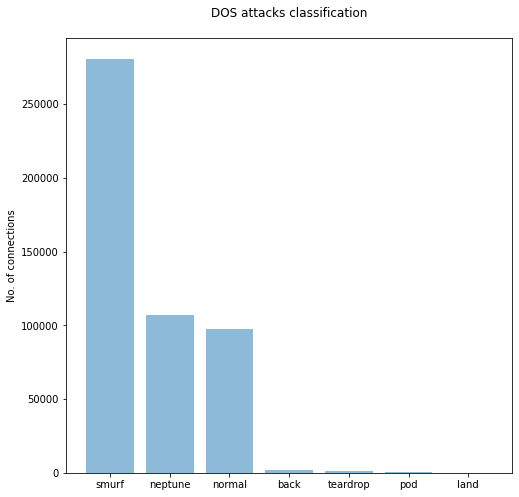

In [16]:
#Drawing a bar graph to classify DOS attacks in connections
objects = ('smurf', 'neptune', 'normal', 'back', 'teardrop', 'pod', 'land')
y_pos = np.arange(len(objects))
performance = [280790,107201,97277,2203,979,264,21]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('No. of connections')
plt.title('DOS attacks classification\n')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

In [17]:
#Mapping of Categorical data in the dataset
cleanup_nums = {"protocol_type":     {"tcp": 1, "icmp": 2, "udp": 3},
                "service": {"vmnet": 1, "smtp": 2, "ntp_u":3, "shell":4, "kshell":5, "aol":6, "imap4":7, "urh_i":8, "netbios_ssn":9,
                           "tftp_u":10, "mtp":11, "uucp":12, "nnsp":13, "echo":14, "tim_i":15, "ssh":16, "iso_tsap":17, "time":18,
                           "netbios_ns":19,"systat":20, "hostnames":21, "login":22, "efs":23, "supdup":24, "http_8001":25, "courier":26,
                           "ctf":27,"finger":28,"nntp":29,"ftp_data":30,"red_i":31,"ldap":32,"http":33,"ftp":34,"pm_dump":35,"exec":36,
                           "klogin":37,"auth":38,"netbios_dgm":39,"other":40,"link":41,"X11":42,"discard":43,"private":44,"remote_job":45,
                           "IRC":46,"daytime":47,"pop_3":48,"pop_2":49,"gopher":50,"sunrpc":51,"name":52,"rje":53,"domain":54,"uucp_path":55,
                           "http_2784":56,"Z39_50":57,"domain_u":58,"csnet_ns":59,"whois":60,"eco_i":61,"bgp":62,"sql_net":63,"printer":64,
                           "telnet":65,"ecr_i":66,"urp_i":67,"netstat":68,"http_443":69,"harvest":70},
               "flag":{"RSTR":1,"S3":2,"SF":3,"RSTO":4,"SH":5,"OTH":6,"S2":7,"RSTOS0":8,"S1":9,"S0":10,"REJ":11}}
#Replacing the encoded data in the dataset
datapre.replace(cleanup_nums, inplace=True)
datapre.head()
datapre.transpose()

,0,1,2,3,4,5,6,7,8,9,...,488725,488726,488727,488728,488729,488730,488731,488732,488733,488734
duration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
protocol_type,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
service,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
flag,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
src_bytes,181,239,235,219,217,217,212,159,210,212,...,308,291,289,306,289,310,282,203,291,219
dst_bytes,5450,486,1337,1337,2032,2032,1940,4087,151,786,...,662,1862,244,662,1862,1881,2286,1200,1200,1234
land,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wrong_fragment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urgent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hot,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Replacing all the types of DOS attacks as 1 and others as 0
datapre['label'][datapre['label']!='normal'] = 'attack'
datapre['label'][datapre['label']=='normal'] = 0
datapre['label'][datapre['label']=='attack'] = 1
datapre[['label']] = datapre[['label']].apply(pd.to_numeric)
datapre['label'].value_counts()

d:\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
d:\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd fr

1    391458
0     97277
Name: label, dtype: int64

In [19]:
#Sampling 25% of the data without replacement
from sklearn.model_selection import train_test_split
# Generate the sampleset from training set.  Set random_state to be able to replicate results.
sampleset1 = datapre.sample(frac=0.5, random_state=1)
sampleset = sampleset1.sample(frac=0.5, random_state=1)
# Print the shape of sample set.
sampleset['label'].value_counts()

1    97754
0    24430
Name: label, dtype: int64

In [20]:
#We will work with this dataset with the x feature-object matrix and values of the y target variable.
array=sampleset.values
x=array[:,0:41]
y=array[:,41]

In [21]:
#Cross validation
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train, features_test, labels_train, labels_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=42)

------------------------------------------
Accuracy =  93.88367525098211  %
[[ 5183  2049]
 [  193 29231]]
              precision    recall  f1-score   support

         0.0       0.96      0.72      0.82      7232
         1.0       0.93      0.99      0.96     29424

    accuracy                           0.94     36656
   macro avg       0.95      0.86      0.89     36656
weighted avg       0.94      0.94      0.94     36656



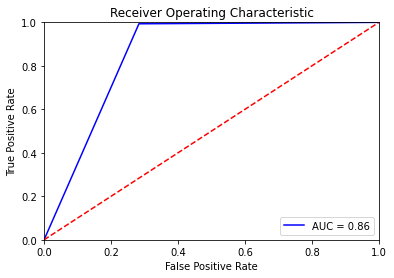

In [22]:
#Naive Bayes Classifier
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
clf = GaussianNB()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)
report = classification_report(labels_test, prediction)
print(report)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [23]:
#Applying Logistic regression to find important features. Higher the rank more important the attribute
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(x, y)
print("Num Features: ",fit.n_features_)
print("Selected Features: ",fit.support_)
print("Ranking of features: ",fit.ranking_)

d:\anaconda3\envs\tf1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\anaconda3\envs\tf1\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\anaconda3\envs\tf1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\anaconda3\envs\tf1\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\anaconda3\envs\tf1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futu

Num Features:  10
Selected Features:  [False  True False False False False False  True False False False  True
 False False False False False False False False False False False False
 False False  True False  True False False False False  True False  True
 False False  True  True  True]
Ranking of features:  [ 6  1 13 16 29 28 14  1 30  2 26  1  5 24 27  8 20 23 18 31 32  7 10 11
  9  4  1 19  1 15 12 25 22  1 21  1 17  3  1  1  1]


In [24]:
#Applying Decision tree to find important features. Higher the score more the important the attribute
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)
# display the relative importance of each attribute
print(model.feature_importances_)

d:\anaconda3\envs\tf1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.16166803e-04 3.96262856e-02 8.60465713e-02 7.16364540e-02
 9.42759914e-03 4.70573585e-04 4.99785034e-05 7.66066493e-03
 0.00000000e+00 3.99768535e-03 1.38634438e-09 1.93830718e-01
 7.91884370e-03 1.88307100e-09 4.27696401e-06 8.70058331e-08
 1.14999742e-08 0.00000000e+00 1.15429753e-05 0.00000000e+00
 0.00000000e+00 3.00870716e-04 1.48931988e-01 1.08804760e-01
 5.60675755e-02 1.46774150e-02 6.41389776e-03 9.01399303e-03
 5.79186242e-02 1.94746395e-04 1.83867347e-03 3.24909198e-03
 4.83112114e-02 6.40800629e-03 5.94070543e-03 3.93773275e-02
 2.70159344e-03 4.76593835e-02 1.33131638e-02 1.19356683e-03
 6.88594314e-03]


In [25]:
#Dropping all the other unselecteced attributes from dataset
datapre.drop('duration', axis = 1, inplace = True)
print("Dropping duration")
datapre.drop('flag', axis = 1, inplace = True)
print("Dropping flag")
datapre.drop('dst_bytes', axis = 1, inplace = True)
print("Dropping dst_bytes")
datapre.drop('land', axis = 1, inplace = True)
print("Dropping land")
datapre.drop('wrong_fragment', axis = 1, inplace = True)
print("Dropping wrong_fragment")
datapre.drop('urgent', axis = 1, inplace = True)
print("Dropping urgent")
datapre.drop('hot', axis = 1, inplace = True)
print("Dropping hot")
datapre.drop('num_failed_logins', axis = 1, inplace = True)
print("Dropping num_failed_logins")
datapre.drop('logged_in', axis = 1, inplace = True)
print("Dropping logged_in")
datapre.drop('lnum_compromised', axis = 1, inplace = True)
print("Dropping lnum_compromised")
datapre.drop('lroot_shell', axis = 1, inplace = True)
print("Dropping lroot_shell")
datapre.drop('lsu_attempted', axis = 1, inplace = True)
print("Dropping lsu_attempted")
datapre.drop('lnum_root', axis = 1, inplace = True)
print("Dropping lnum_root")
datapre.drop('lnum_file_creations', axis = 1, inplace = True)
print("Dropping lnum_file_creations")
datapre.drop('lnum_shells', axis = 1, inplace = True)
print("Dropping lnum_shells")
datapre.drop('lnum_access_files', axis = 1, inplace = True)
print("Dropping lnum_access_files")
datapre.drop('lnum_outbound_cmds', axis = 1, inplace = True)
print("Dropping lnum_outbound_cmds")
datapre.drop('is_host_login', axis = 1, inplace = True)
print("Dropping is_host_login")
datapre.drop('is_guest_login', axis = 1, inplace = True)
print("Dropping is_guest_login")
datapre.drop('srv_count', axis = 1, inplace = True)
print("Dropping srv_count")
datapre.drop('serror_rate', axis = 1, inplace = True)
print("Dropping serror_rate")
datapre.drop('srv_serror_rate', axis = 1, inplace = True)
print("Dropping srv_serror_rate")
datapre.drop('rerror_rate', axis = 1, inplace = True)
print("Dropping rerror_rate")
datapre.drop('srv_rerror_rate', axis = 1, inplace = True)
print("Dropping srv_rerror_rate")
datapre.drop('diff_srv_rate', axis = 1, inplace = True)
print("Dropping diff_srv_rate")
datapre.drop('srv_diff_host_rate', axis = 1, inplace = True)
print("Dropping srv_diff_host_rate")
datapre.drop('dst_host_count', axis = 1, inplace = True)
print("dst_host_count")
datapre.drop('dst_host_srv_count', axis = 1, inplace = True)
print("Dropping dst_host_srv_count")
datapre.drop('dst_host_diff_srv_rate', axis = 1, inplace = True)
print("Dropping dst_host_diff_srv_rate")
datapre.drop('dst_host_srv_diff_host_rate', axis = 1, inplace = True)
print("Dropping dst_host_srv_diff_host_rate")
datapre.drop('dst_host_serror_rate', axis = 1, inplace = True)
print("Dropping dst_host_serror_rate")
datapre.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)
print("Dropping dst_host_srv_serror_rate")
datapre.drop('dst_host_rerror_rate', axis = 1, inplace = True)
print("Dropping dst_host_rerror_rate")
datapre.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)
print("Dropping dst_host_srv_rerror_rate")

Dropping duration
Dropping flag
Dropping dst_bytes
Dropping land
Dropping wrong_fragment
Dropping urgent
Dropping hot
Dropping num_failed_logins
Dropping logged_in
Dropping lnum_compromised
Dropping lroot_shell
Dropping lsu_attempted
Dropping lnum_root
Dropping lnum_file_creations
Dropping lnum_shells
Dropping lnum_access_files
Dropping lnum_outbound_cmds
Dropping is_host_login
Dropping is_guest_login
Dropping srv_count
Dropping serror_rate
Dropping srv_serror_rate
Dropping rerror_rate
Dropping srv_rerror_rate
Dropping diff_srv_rate
Dropping srv_diff_host_rate
dst_host_count
Dropping dst_host_srv_count
Dropping dst_host_diff_srv_rate
Dropping dst_host_srv_diff_host_rate
Dropping dst_host_serror_rate
Dropping dst_host_srv_serror_rate
Dropping dst_host_rerror_rate
Dropping dst_host_srv_rerror_rate


In [28]:
#Writing the extracted data into new file
datapre.to_csv("KDDCup99DOSONLY.csv",encoding='utf-8', index=False)
datapre.head()

,protocol_type,service,src_bytes,count,same_srv_rate,dst_host_same_srv_rate,dst_host_same_src_port_rate,label
0,1,33,181,8,1.0,1.0,0.11,0
1,1,33,239,8,1.0,1.0,0.05,0
2,1,33,235,8,1.0,1.0,0.03,0
3,1,33,219,6,1.0,1.0,0.03,0
4,1,33,217,6,1.0,1.0,0.02,0


In [29]:
#Sampling 25% of the data with replacement
from sklearn.model_selection import train_test_split
# Generate the sampleset from training set.  Set random_state to be able to replicate results.
sampleset1 = datapre.sample(frac=0.5, random_state=1)
sampleset = sampleset1.sample(frac=0.5, random_state=1)
# Print the shape of sample set.
sampleset['label'].value_counts()

1    97754
0    24430
Name: label, dtype: int64

In [30]:
#We will work with this dataset with the x feature-object matrix and values of the y target variable.
array=sampleset.values
x=array[:,0:7]
y=array[:,7]

In [31]:
#Cross validation
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train, features_test, labels_train, labels_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=42)

In [32]:
#Array for storing classifier Models and their respective scores
models=[]
scores=[]

------------------------------------------
Accuracy =  98.47228284591881  %
[[ 7028   204]
 [  356 29068]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      7232
         1.0       0.99      0.99      0.99     29424

    accuracy                           0.98     36656
   macro avg       0.97      0.98      0.98     36656
weighted avg       0.98      0.98      0.98     36656



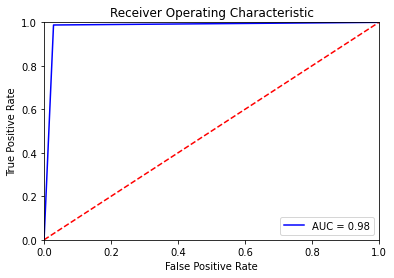

In [33]:
#Naive Bayes Classifier
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
clf = GaussianNB()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)
report = classification_report(labels_test, prediction)
print(report)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

models.append("Naive Bayes Classifier")
scores.append(acc*100)

------------------------------------------
Accuracy =  99.97817546922741  %
[[ 7230     2]
 [    6 29418]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7232
         1.0       1.00      1.00      1.00     29424

    accuracy                           1.00     36656
   macro avg       1.00      1.00      1.00     36656
weighted avg       1.00      1.00      1.00     36656



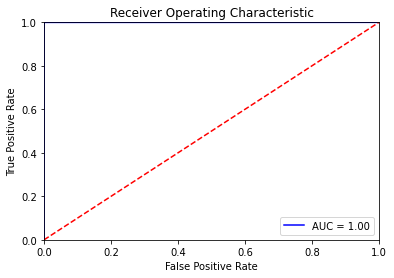

In [34]:
#Decision Tree Classisfier 
from sklearn import tree
clf = tree.DecisionTreeClassifier(splitter = "random", criterion = "entropy", max_depth = 20)
 
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
from sklearn.metrics import accuracy_score
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)
report = classification_report(labels_test, prediction)
print(report)


from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

models.append("Decision tree Classifier")
scores.append(acc*100)

d:\anaconda3\envs\tf1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------
Accuracy =  99.98363160192056  %
[[ 7232     0]
 [    6 29418]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7232
         1.0       1.00      1.00      1.00     29424

    accuracy                           1.00     36656
   macro avg       1.00      1.00      1.00     36656
weighted avg       1.00      1.00      1.00     36656

------------------------------------------
Accuracy =  99.97271933653427  %
[[ 7229     3]
 [    7 29417]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7232
         1.0       1.00      1.00      1.00     29424

    accuracy                           1.00     36656
   macro avg       1.00      1.00      1.00     36656
weighted avg       1.00      1.00      1.00     36656



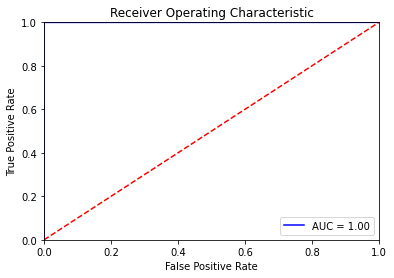

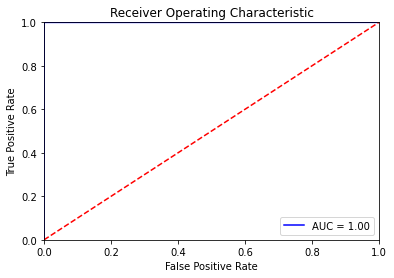

In [35]:
#Random Forest Classifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)

report = classification_report(labels_test, prediction)
print(report)


from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

models.append("Random Forest Classifier")
scores.append(acc*100)


#K-Nearest Neighbour Classifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
# fit a k-nearest neighbor model to the data
clf = KNeighborsClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)

report = classification_report(labels_test, prediction)
print(report)


from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

models.append("K-Nearest neighbour Classifier")
scores.append(acc*100)

In [36]:
#Making a dataframe that consists of models and their respective scores
dat = pd.DataFrame(index=[1,2,3,4])
dat["Model"] = models
dat["Score"] = scores
dat.set_index("Model")

,Score
Model,
Naive Bayes Classifier,98.472283
Decision tree Classifier,99.978175
Random Forest Classifier,99.983632
K-Nearest neighbour Classifier,99.972719
